# Randomness and Probability

## Acknowledgment 

Some of the content here is based on [Computational and Inferential Thinking: The Foundations of Data Science](https://inferentialthinking.com/chapters/intro.html), by A. Adhikari, J. DeNero, D. Wagner.

On the other hand, this text uses its own module `datascience` for data frame manipulations, while we will use pandas, which is the most commonly used library for data frames in Python.

## Importing Modules

Let's start by importing the necessary modules:

In [1]:
import numpy as np

import pandas as pd
# pd.options.future.infer_string = True
# pd.options.mode.copy_on_write = True

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)  # default figure size
plt.style.use("ggplot")  # style sheet

## Techinical Note: `tqdm`

We will be running some experiments with a large number of repetitions, so we will introduce a tool that provides progress bars for for-loops in Jupyter notebooks: [tqdm](https://github.com/tqdm/tqdm).  It does not come with Python (although it does come with Anaconda), so to install it just do

```
pip install tqdm
```

We need to import it before we use it:

In [2]:
from tqdm.notebook import tqdm

(We just need to import the `tqdm` function itself.)  To use, simply use

```python
for i in tqdm(range(N)):
   ... # body
```

instead of

```python
for i in range(N):
   ... # body
```

## Review

Let's review some tools from pands and NumPyu that will be useful here.

### Randomness in NumPy

One can use NumPy's functions to simulate random events and get [empirical probabilities](https://en.wikipedia.org/wiki/Empirical_probability).

Here are some of the functions that we can use:

| **Function**                                 | **Description**                                                               |
|----------------------------------------------|-------------------------------------------------------------------------------|
| `np.random.random(count)`                    | Produces `count` random floats between `0.0` and `1.0`                        |
| `np.random.randint(start, end, count=count)` | Produces `count` random integers between `start` and `end - 1`                |
| `np.random.choice(array, count=count)`       | Produces `count` random random elements of `array` (with possible repetition) |
| `np.random.normal(mean, std, count)`         | Choose `count` random floats with normal probability curve                    |

For instance, one can simulate tossing a (fair) coin with:

In [3]:
np.random.choice(["Heads", "Tails"])

'Tails'

(Rerun the cell above to see the results change.  **Note:** If you run it with `Ctrl + Enter` or `Cmd + Return`, it will run the cell and *not move to the next*.  This allows you to easily rerun it many times.)

Or rolling a (fair) die with:

In [4]:
np.random.randint(1, 7)  # note we need 7, and not 6

2

We can also simulate running it multiple times, by adding a new argument.

So, to toss a fair coin ten times, we can do:

In [5]:
np.random.choice(["Heads", "Tails"], 10)

array(['Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads'], dtype='<U5')

To roll a die ten times:

In [6]:
np.random.randint(1, 7, 10)

array([2, 1, 4, 4, 4, 1, 3, 6, 3, 1])

### `value_counts`

In solving the problems below, the pandas methods [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) will come handy.  Let's see it in action.

First, let's create a data frame with some random values:

In [7]:
df = pd.DataFrame(
    {
        "Col1": np.random.randint(1, 5, 20),
        "Col2": np.random.choice(np.array(["A", "B", "C", "D"]), 20),
    }
)
df

,Col1,Col2
0,2,D
1,4,C
2,2,D
3,2,A
4,4,B
5,2,C
6,2,B
7,3,C
8,3,B
9,2,D


We use `value_counts` to see how many times each value occur in a column:

In [8]:
df["Col1"].value_counts()

Col1
2    9
3    6
4    4
1    1
Name: count, dtype: int64

In [9]:
df["Col2"].value_counts()

Col2
B    8
D    6
C    5
A    1
Name: count, dtype: int64

Note that the *index* (on the left) is the set of distinct values of the given column, and the entries (of the series) are the counts for each corresponding value.  By default, it is sorted by the number of occurrences (i.e., counts) in *decreasing* order.

We can make this resulting series into an array by using `to_numpy` (the index is dropped):

In [10]:
df["Col2"].value_counts().to_numpy()

array([8, 6, 5, 1])

### Comparing Arrays

Remember that if we want to check if two arrays are equal, we don't use `==`:

In [11]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = np.array([1, 2, 4])

Clearly, `a` and `b` are equal, but `c` is different.

If we try to use `==`:

In [12]:
a == b

array([ True,  True,  True])

In [13]:
a == c

array([ True,  True, False])

With `==`, we check if each entry of the first array is equal to each entry of the second, so we get as result an *array* of booleans (`True`and `False`).

We use instead `np.array_equal`:

In [14]:
np.array_equal(a, b)

True

In [15]:
np.array_equal(a, c)

False

### Counting Occurrences

We can use `np.count_nonzero` to count how many times some condition on an array is satisfied.

As the name says, it counts the number of non-zero elements in an array:

In [16]:
np.count_nonzero(np.array([0, 1, 2, 0, 4, 0, 3, 2]))

5

On the other hand, in Python the boolean `False` is (sometimes) treated as zero, while `True` is non-zero.  Hence, `np.count_nonzero` can be used to count the number of `True`'s in a boolen array:

In [17]:
np.count_nonzero(np.array([True, True, False, False, True]))

3

Thus, we can also check conditions:

In [18]:
np.count_nonzero(np.array([1, 3, 5, 0, 2, 1, 5]) > 2)

3

### `sample`

The pandas data frame method [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) selects a random number of rows of a data frame.

For example, lets select four random rows of our (random) data frame `df`:

In [19]:
df.sample(4)

,Col1,Col2
10,3,B
14,2,B
17,3,D
4,4,B


Again, run it a few times to see how we get different results each time.

By default, `.sample` does not allow a row to be repeated.  To allow it, use the `replace=True` optional argument.  (Let's sort the index to make it easier to see the repeated rows.)

In [20]:
df.sample(12, replace=True).sort_index()

,Col1,Col2
0,2,D
1,4,C
1,4,C
2,2,D
2,2,D
4,4,B
4,4,B
8,3,B
9,2,D
16,4,C


(Run it a few times, if you don't see a repeated row.)

Instead of a number of rows, one can pass the *fraction* of the total number of rows we want to draw with the argument `frac=`.  For example, `sample(frac=0.5)` will randomly select half as many as the total number of rows.

In [21]:
df.sample(frac=0.5)

,Col1,Col2
9,2,D
2,2,D
6,2,B
3,2,A
4,4,B
12,3,B
13,2,D
11,2,B
16,4,C
10,3,B


In particular, we can *shuffle the (order of the) rows* using `frac=1`:

In [22]:
df.loc[:5].sample(frac=1)

,Col1,Col2
3,2,A
2,2,D
0,2,D
1,4,C
4,4,B
5,2,C


## Tracking and Visualizing Number of Occurrences

We expect that if repeat the tossing of a coin, we get about half of the results to be Heads, and half to be Tails.  This is a consequence of the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).


Let's check it in practice:

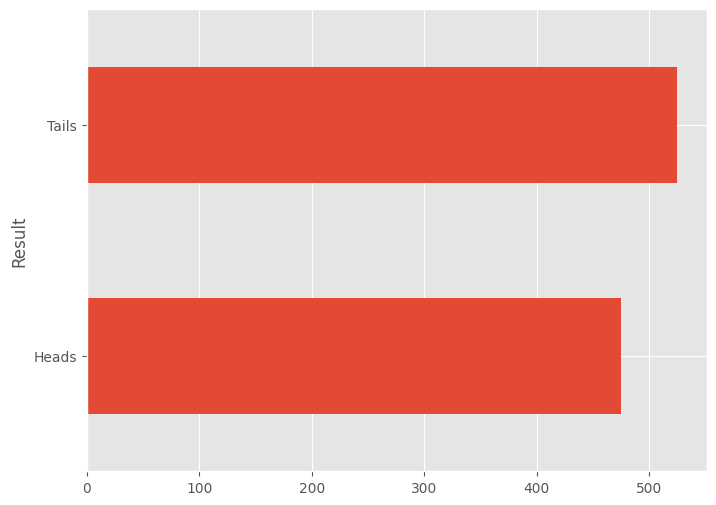

In [23]:
number_of_repetitions = 1_000

# array with results of each toss
tosses = np.random.choice(["Heads", "Tails"], number_of_repetitions)

# make it into a data frame
tosses_df = pd.DataFrame({"Result": tosses})

# count each result and make a bar graph
tosses_df.groupby("Result").size().plot(kind="barh");

Similarly, if we roll a die many times, we expect each value to appear about one sixth of the time:

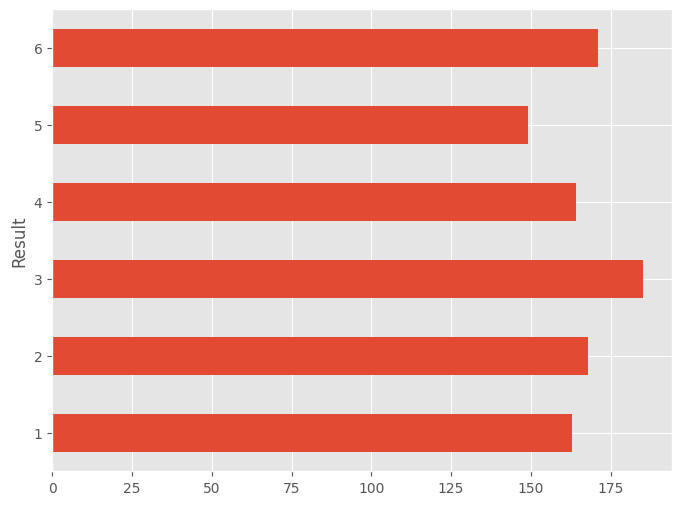

In [24]:
number_of_repetitions = 1_000

# array with results of each roll
rolls = np.random.randint(1, 7, number_of_repetitions)

# make it into a data frame
rolls_df = pd.DataFrame({"Result": rolls})

# count each result and make a bar graph
rolls_df.groupby("Result").size().plot(kind="barh");

The more repetitions, the closer the proportions get to being equal:

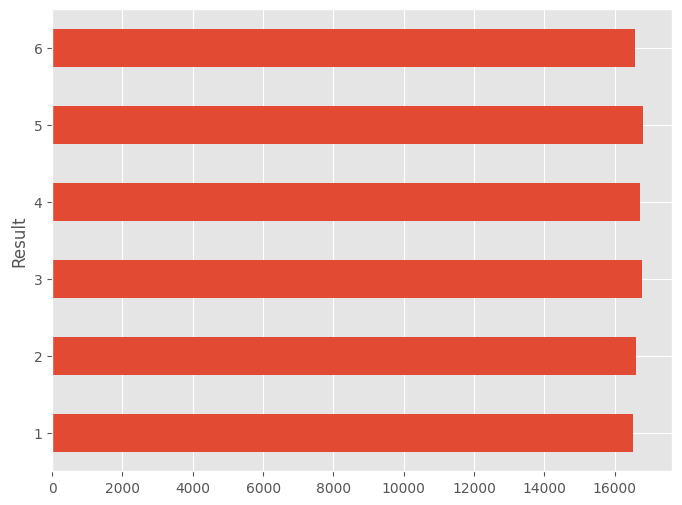

In [25]:
# increase the number of repetitions!
number_of_repetitions = 100_000

rolls = np.random.randint(1, 7, number_of_repetitions)
rolls_df = pd.DataFrame({"Result": rolls})

rolls_df.groupby("Result").size().plot(kind="barh");

Of course, we expect the numbers of occurrences for each possible result to get closer to being equal (proportionally speaking) the more times we repeat, because each value has exactly the same probability: $1/2$ for the coin, and $1/6$ for the die.

## Empirical Probabilities

### Tossing Three Coins

The Law of Large Numbers implies that if repeat an experiment a large number of times, the proportion of times an event occurs approaches to the probability of it occurring.

For instance, the probability of getting three Heads when tossing a (fair) coin three times is

$$
\frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{8}.
$$

So, if we toss a coin three times many times over, the proportion of times we get three heads should be about $\dfrac{1}{8} = 0.125$, and the more times we do it, the closer we get to $0.125$.

Let's try to visualize this.

#### Visualizing

Let's write a function to visualize how increasing the number of tosses of the three coins, we get proportions closer to the probability of $0.125$.

We first write functions for tossing three coins and checking if we get three heads:

In [26]:
def toss_three_coins():
    """
    Simulates toissing a coin three times.

    INPUT:
    None.

    OUTPUT:
    Array of "Heads" and "Tails" of length 3.
    """
    return np.random.choice(np.array(["Heads", "Tails"]), 3)


def is_three_heads(toss):
    """
    Given an array, checks if it is equal to ["Heads", "Heads", "Heads"].

    INPUT:
    An array (supposedly of length 3, containing "Heads" and/or "Tails").

    OUTPUT:
    True/False, depending if it contains three heads or not.
    """
    return np.array_equal(toss, np.array(3 * ["Heads"]))


def plot_prop_three_heads(number_of_tosses):
    """
    Given the number of tosses, plots the proportions of three heads obtained
    up to the given number.

    INPUT:
    number_of_tosses: number of times up to which we simulate tossing a fair coin.

    OUTPUT:
    A scatter plot with the number of tosses and proportion of times three heads were obtained.
    """
    # initialize
    three_heads = np.zeros(number_of_tosses, dtype=np.int32)

    # put a 1 every times we get three heads
    for i in tqdm(range(number_of_tosses)):
        toss = toss_three_coins()
        if is_three_heads(toss):
            three_heads[i] = 1

    # get the cumulative number of three heads obtained
    number_of_three_heads = np.cumsum(three_heads)

    # get the proportion
    prop_of_heads = number_of_three_heads / np.arange(1, number_of_tosses + 1)

    # plot the expected proportion
    plt.plot([1, number_of_tosses], [0.125, 0.125], c="green", linestyle="dashed", linewidth=2)

    # plot the proportions, in steps
    step_size = int(np.ceil(number_of_tosses / 50))  # at most 50 steps
    plt.scatter(
        np.arange(1, number_of_tosses + 1, step_size), prop_of_heads[::step_size]
    )

Let's start with a small number of repetitions (of the three tosses):

  0%|          | 0/50 [00:00<?, ?it/s]

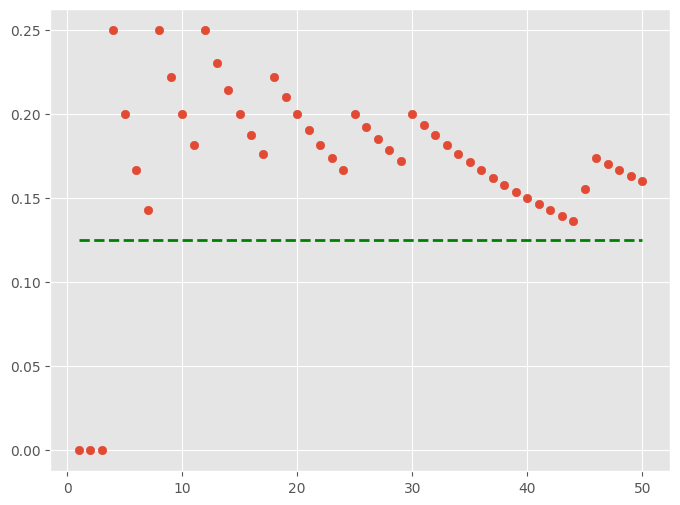

In [27]:
plot_prop_three_heads(50)

The result you will obtain above is random, so we are not very sure what to expect.  But, most likely, the proportions will not be very close to the expected $0.125$.

But, the more you increase the number of repetitions, the more the larger values get to $0.125$:

  0%|          | 0/200 [00:00<?, ?it/s]

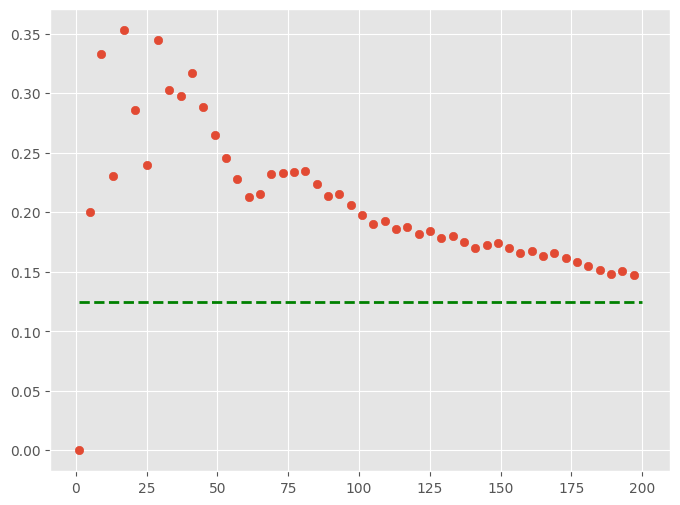

In [28]:
plot_prop_three_heads(200)

  0%|          | 0/2000 [00:00<?, ?it/s]

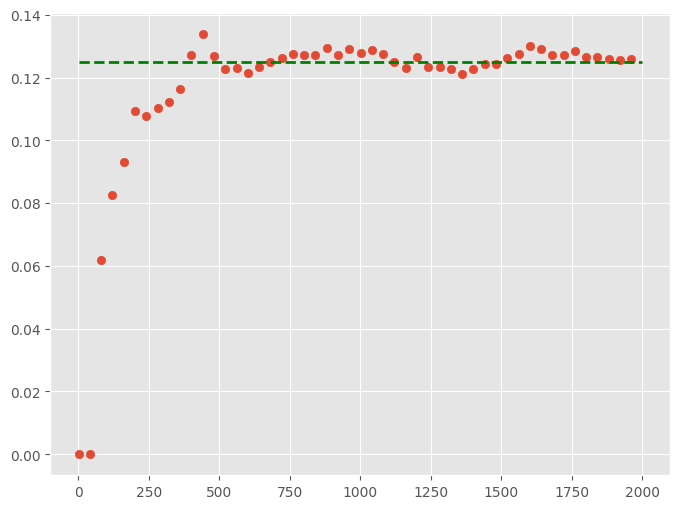

In [29]:
plot_prop_three_heads(2_000)

  0%|          | 0/20000 [00:00<?, ?it/s]

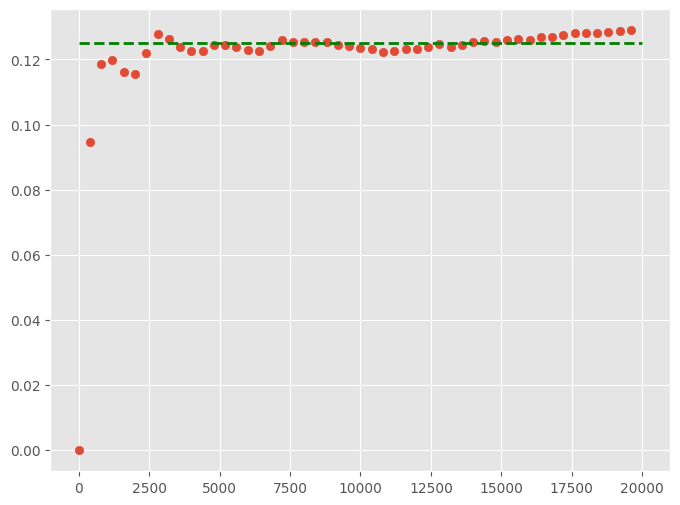

In [30]:
plot_prop_three_heads(20_000)

### Sum of Two Dice

Now, let's pretend we don't know the probabilities for obtaining a particular value when we roll two dice and add their values.

As we've seen above, we can get very good ideas but running this experiment many times over, and keeping track of the proportions we obtain.

Let's them simulate this, with $10{,}000$ rolls.  We will use a data frame to keep track of the values of each die and their sum:

In [31]:
number_of_repetitions = 10_000

# rolls of the first die
die1 = np.random.randint(1, 7, number_of_repetitions)

# rolls of the second die
die2 = np.random.randint(1, 7, number_of_repetitions)

# create the data frame
rolls = pd.DataFrame({
    "Die 1": die1,
    "Die 2": die2,
    "Sum": die1 + die2
})

rolls

,Die 1,Die 2,Sum
0,5,2,7
1,5,5,10
2,4,1,5
3,6,6,12
4,2,6,8
...,...,...,...
9995,4,1,5
9996,5,1,6
9997,5,4,9
9998,5,5,10


Let's see the proportions of each sum with a density histogram:

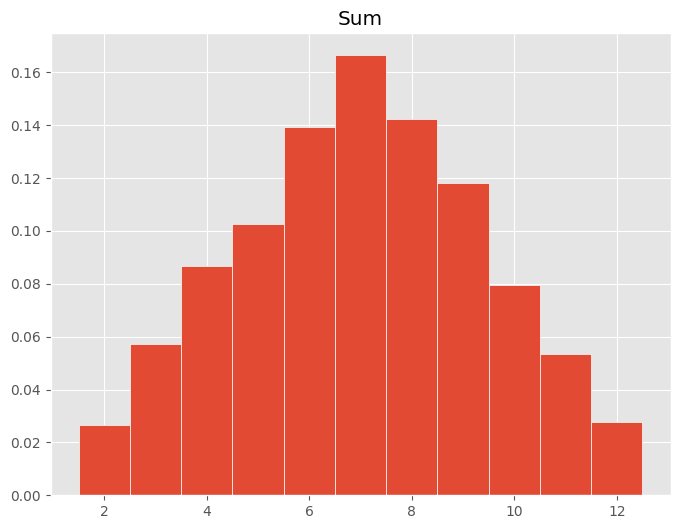

In [32]:
# the bins are of length 1, centered on 2, 3, 4, ..., 12.
rolls.hist("Sum", ec="white", density=True, bins=np.arange(1.5, 13, 1));

Note that since the lengths of the bins are all equal one, the heights are indeed the proportions.  Since we performed the rolls a large number of times, these proportions should be close the actual probabilities.

It's clear then that some sums are more likely than others, which is not unexpected.

It is not hard to compute the actual probabilities, but if we don't know it, we can get good approximations from our experiment.  This would be an *empirical probability*, i.e., a probability obtained from an experiment.  We just need to find the proportions in our experiment.  If the number of repetitions is large enough, we should get numbers very close to the actual theoretical probability:

In [33]:
# data frame with counts and proportions for each sum of the two dice
rolls_count_prop = (
    rolls.groupby("Sum")
    .size()
    .to_frame("Count")
    .assign(Proportion=lambda count: count / number_of_repetitions)
)

rolls_count_prop

,Count,Proportion
Sum,,
2,264,0.0264
3,572,0.0572
4,866,0.0866
5,1027,0.1027
6,1393,0.1393
7,1664,0.1664
8,1424,0.1424
9,1182,0.1182
10,795,0.0795


So, the probability of rolling a 2 should be about $3\%$, while the probability of rolling a 7 should be about $17\%$.  

Since there is only one way to get a 2, which is the roll with both dies getting 1 on top, out of the possible $36$ different ways to get the roll of two dice, the actual probability is $1/36 \approx 2.77\%$.

There are 6 possible rows that add to $7$: a 1 and a 6, a 2 and 5, etc., all the way to a 6 and 1.  So, the actual probability is $6/36 = 1/6 \approx 16.7\%$.

Let's add the actual probabilities and find the errors:

In [34]:
actual_prob = np.array(
    [
        1 / 36,
        2 / 36,
        3 / 36,
        4 / 36,
        5 / 36,
        6 / 36,
        5 / 36,
        4 / 36,
        3 / 26,
        2 / 36,
        1 / 36,
    ]
)

# data frame with count, proportions, actual probability, and error
# from approximating by proportion
(
    rolls_count_prop
    .assign(Probability=actual_prob)
    .assign(
        Error=lambda df_: np.abs(df_["Proportion"] - df_["Probability"])
    )
)

,Count,Proportion,Probability,Error
Sum,,,,
2,264,0.0264,0.027778,0.001378
3,572,0.0572,0.055556,0.001644
4,866,0.0866,0.083333,0.003267
5,1027,0.1027,0.111111,0.008411
6,1393,0.1393,0.138889,0.000411
7,1664,0.1664,0.166667,0.000267
8,1424,0.1424,0.138889,0.003511
9,1182,0.1182,0.111111,0.007089
10,795,0.0795,0.115385,0.035885


### Poker

Let's now look at the [game of poker](https://en.wikipedia.org/wiki/Poker).

The game is played with a [standard 52-card deck](https://en.wikipedia.org/wiki/Standard_52-card_deck).  Each card has a rank and a suit.  Let's create a deck as a data frame.

We will also add a numerical *value* for each card, which can be used to check if cards are in sequence.  (We will have strings for our ranks, since we have `"A"` for ace, for example.  The values can be used for ordering the cards in sequence, for instance, with a hand with `[9, 10, J, Q, K]` or `[10, J, Q, K, A]`.)

We will use a [np.repeat](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and [np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html) to create the data frame for the deck.

In [35]:
# single values for ranks, suits, and values
ranks = ["A"] + [str(i) for i in range(2, 11)] + ["J", "Q", "K"]
suits = ["Diamonds", "Clubs", "Hearts", "Spades"]
values = [13] + list(range(1, 13))

# create the deck data frame
deck = pd.DataFrame({"Rank": np.tile(ranks, 4), "Suit": np.repeat(suits, 13), "Value": np.tile(values, 4)})

deck

,Rank,Suit,Value
0,A,Diamonds,13
1,2,Diamonds,1
2,3,Diamonds,2
3,4,Diamonds,3
4,5,Diamonds,4
5,6,Diamonds,5
6,7,Diamonds,6
7,8,Diamonds,7
8,9,Diamonds,8
9,10,Diamonds,9


Now, let's write a function that draws 5 cards from the deck.  We can simply use the `sample` method:

In [36]:
def draw_five():
    """
    Draws five cards from the deck.

    INPUT:
    None.

    OUTPUT:
    A data frame with five random cards from the deck.
    """
    return (deck
            .sample(5)
            .sort_values(["Value", "Suit"])
            .reset_index(drop=True))



Run the cell below a few times to see what hands you get:

In [37]:
draw_five()

,Rank,Suit,Value
0,3,Hearts,2
1,4,Clubs,3
2,5,Spades,4
3,8,Spades,7
4,K,Hearts,12


There are many [poker hands](https://en.wikipedia.org/wiki/List_of_poker_hands), and it is not hard to compute the exact probability of each.  The highest valued hands are *extremely* unlikely.  For instance, the probability of getting *four of a kind* (four cards with the same rank) is 

$$
\frac{13 \cdot 48}{\displaystyle \binom{52}{5}} = \frac{624}{2{,}598{,}960} = \frac{1}{4{,}165} \approx 0.00024 = 0.0240\%.
$$

A *straight-flush* (five cards in sequence and with the same suit) is even less likely, with a probability of

$$
\frac{9 \cdot 4}{\displaystyle \binom{52}{5}} = \frac{36}{2{,}598{,}960} = \frac{3}{216{,}580} \approx 0.00001385 = 0.001385\%.
$$

We will focus on lower valued hands, which have a higher probability.  We will look at two hands:

  * **Two pairs**: two cards of matching rank, another two cards matching a different rank, and a fifth card with a rank different from the previous two.  Suits don't matter.
  * **Straight**: the ranks in sequence of *values* of increasing order, like, `[3, 4, 5, 6, 7]`, or `[10, J, Q, K, A]`, but *not all suits the same*!  (That would be a *straight flush* instead.)  **Note that we assume here that `A` comes after `K` and not before `2`.**
  
Hence, now we need functions that take a hand (a data frame of five cards) and return `True` if we have two pairs or a straight, respectively, and `False` otherwise.



#### Two Pairs

We can easily check for two pairs using `value_counts`: if a hand has two pairs, the value counts for Rank should give an array with `[2, 2, 1]`:

In [38]:
def is_two_pairs(hand):
    """
    Check if hand is two pairs.

    INPUT:
    hand: data frame with five rows from the deck.

    OUTPUT:
    True/False if the hands is two of a kind or not.
    """
    return np.array_equal(
        hand["Rank"].value_counts().to_numpy(),
        np.array([2, 2, 1]))

Let's create some hands, and use them to check:

In [39]:
hands = [
    deck.iloc[[2, 43, 50, 28, 30]],  # two pairs
    deck.iloc[[2, 28, 41, 20, 33]],  # full house
    deck.iloc[[2, 28, 41, 43, 50]],  # three of a kind
    deck.iloc[[2, 28, 30, 40, 50]],  # one pair
    deck.iloc[[2, 20, 41, 43, 50]],  # one pair
]

In [40]:
# only first should be true
for hand in hands:
    print(is_two_pairs(hand))

True
False
False
False
False


#### Straight

Now, let's check if we have a straight.

The first thing to be careful is that we do not count straight flushes as a (simple) straight.  We can then just check if all the suits are the same before we test if the cards are in sequence.

Next, we need to check if the cards are in sequence.  There are many ways to do this.  Here we can just sort the Value column, get the lowest card (the first one, after sorting), and check if we have 5 cards in sequence from there:

In [41]:
def is_straight(hand):
    """
    Check if hand is a straight.

    INPUT:
    hand: five rows of the deck data frame.

    OUTPUT:
    True/False if the hand is a straight or not.
    """
    # all same suit?
    if len(hand["Suit"].value_counts()) == 1:
        return False

    # is it in sequence?
    values = np.sort(hand["Value"].to_numpy())
    lowest_card = values[0]
    return np.array_equal(values, np.arange(lowest_card, lowest_card + 5))

Let's test it:

In [42]:
hands = [
    deck.iloc[[20, 24, 23, 21, 35]],  # straight
    deck.iloc[[36, 51, 26, 37, 9]],   # straight
    deck.iloc[[39, 14, 15, 16, 17]],  # almost straight
    deck.iloc[[11, 12, 13, 14, 15]],  # nothing...
    deck.iloc[[2, 3, 4, 5, 6]],       # straight-flush
]

In [43]:
# first two should be true
for hand in hands:
    print(is_straight(hand))

True
True
False
False
False


#### Probabilities

Now, let's find approximations for the probabilities of drawing two pairs and straights.  We again need to repeat a large number of draws, and check the proportions.

The number of draws has to be relatively large, since the actual probability of drawing a straight is quite low, but keep in mind that it might take a long time to get the result if the number is too large.

Let's wrap the code in a function to make it easier to test with different number of draws:

In [44]:
def prop_two_pairs_straight(number_of_draws):
    """
    Simulates drawing 5 cards number_of_draws times and returns the proportions 
    of two pairs and straights.

    INPUT:
    number_of_draws: number of times we draw five cards from the deck.

    OUTPUT:
    Tuple with proportions of two pairs and straights, respectively, in all draws.
    """
    # initialize the count
    number_of_two_pairs = 0
    number_of_straights = 0

    # loop
    for i in tqdm(range(number_of_draws)):
        # draw hand
        hand = draw_five()

        # check if two pairs
        if is_two_pairs(hand):
            number_of_two_pairs += 1

        # check if straight
        if is_straight(hand):
            number_of_straights += 1

    return number_of_two_pairs / number_of_draws, number_of_straights / number_of_draws

Let's experiment:

In [45]:
# 10,000 is a lot! It might take a while...
proportions = prop_two_pairs_straight(10_000)

print(f"Probability of drawing two pairs: {proportions[0]:.2%}.")
print(f"Probability of drawing straight:  {proportions[1]:.2%}.")

  0%|          | 0/10000 [00:00<?, ?it/s]

Probability of drawing two pairs: 4.95%.
Probability of drawing straight:  0.29%.


The actual probabilities are about $4.75\%$ and $0.35\%$, but you might not get very close to these with "only" $10{,}000$ draws, especially for the smaller probability for straights.

Feel free to write code to test other hands, e.g., four of a kind, flush, full-house, etc.  Their actual probabilities are not hard to compute (and it is fun to do it ourselves!), but you can find them here: [Poker Probabilties (Wikipedia)](https://en.wikipedia.org/wiki/Poker_probability).

## Distributions

If we toss a coin 50 times, we expect to have *about* 25 heads, and 25 tails.  But it is not very likely that it will be exactly that.  So, let's investigate what sort of variation can happen.

To do so, we will simulate tossing a coin 50 times and keep track of the results.

In this case, all we need is to keep track of one of the possible results (heads or tails).

### Distribution of 50 Coin Tosses

Let's write a function that simulate 50 tosses and keeps track of the number of heads:

In [46]:
def heads_fifty_tosses():
    """
    Number of heads obtained in 50 tosses of a coin.

    INPUT:
    None.

    OUTPUT:
    Number of heads in our 50 simulated tosses.
    """
    results = np.random.choice(["Heads", "Tails"], 50)
    return np.count_nonzero(results == "Heads")

You can run it a few times.  It should hover about 25:

In [47]:
heads_fifty_tosses()

19

Now, we can repeat it many times and keep track of how many heads we obtained.

To do that we will initialize a `results` array with zeros (of type `np.int8`, which handles integers between $-128$ and $127$), loop the given number of times, and add the results of 50 tosses to the corresponding position:

In [48]:
number_of_repetitions = 50_000

# array of results, initialized with zeros
results = np.zeros(number_of_repetitions, dtype=np.int8)

# repeat number_of_repetitions
for i in tqdm(range(number_of_repetitions)):
    results[i] = heads_fifty_tosses()  # add new number of heads to results

  0%|          | 0/50000 [00:00<?, ?it/s]

(Note that in this case, we could have also used [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions):

```python
results = np.array([heads_fifty_tosses() for i in range(number_of_repetitions)])

```

In this case, it is just as efficient as the code above.)

Let's visualize the results with a (density) histogram.  First, let's create bins centered in integer values between 10 and 40:

In [49]:
heads_bins = np.arange(9.5, 41.5, 1)

Now we use it for our histogram:

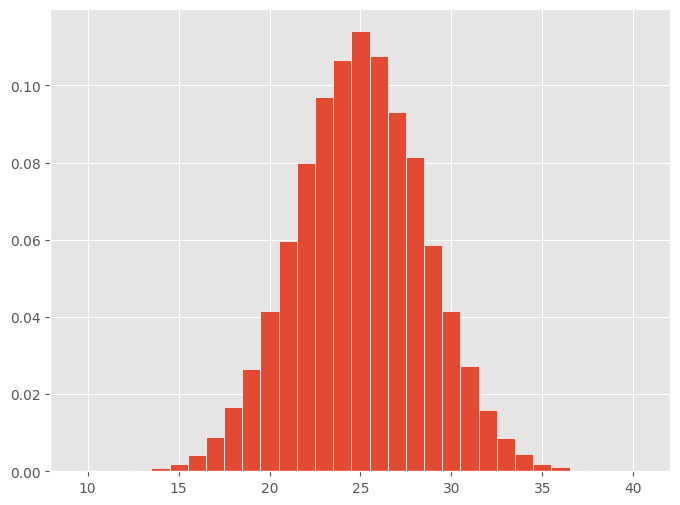

In [50]:
plt.hist(results, ec="white", density=True, bins=heads_bins);

We see a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) around the expected value of 25.

We can also compute some empirical probabilities.  For instance, the probability of getting 30 or more heads is about:

In [51]:
np.count_nonzero(results >= 30) / len(results)

0.10084

The probability of getting between 20 and 30 heads is:

In [52]:
np.count_nonzero((results >= 20) & (results <= 30)) / len(results)

0.8811

**Note the different syntax for NumPy:** 

* we need to surround each condition in parentheses, and 
* use `&` instead of `and`.

If we needed `or`, we would use `|`, and instead of `not`, we use `~`.

#### Comparing to the Normal Curve

Let's compare these results with an actual normal curve: if the average is $\mu$ and the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) is $\sigma$, then the normal curves is given by:

$$
y = \frac{1}{\sigma \, \sqrt{2 \pi}} \mathrm{e}^{-\frac{1}{2}\left(\frac{x-\mu}P\sigma \right)^2}
$$

So, let's get the obtained average and standard deviation:

In [53]:
mean, std_dev = results.mean(), results.std()

print(f"Average:           {mean:.2f}.\nStandard Deviation:  {std_dev:.2f}.")

Average:           24.99.
Standard Deviation:  3.53.


Let's visualize how the histogram fits within the corresponding normal curve.

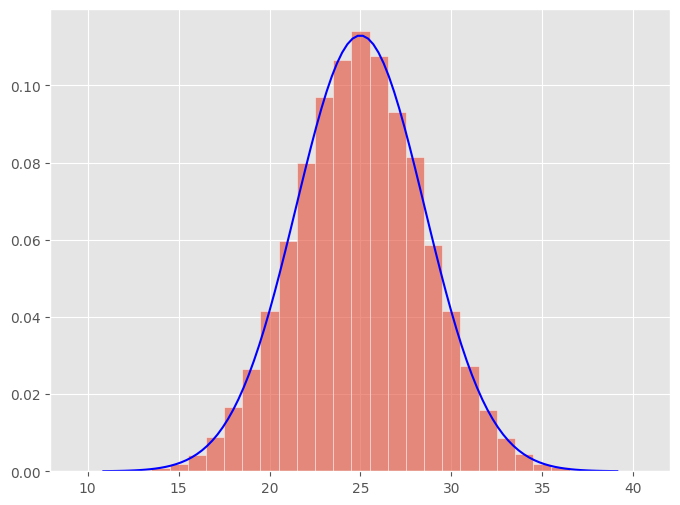

In [54]:
# histogram
plt.hist(results, ec="white", bins=heads_bins, density=True, alpha=0.6)

# normal curve
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
y = 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-1 / 2 * ((x - mean) / std_dev) ** 2)

plt.plot(x, y, c="blue");

## Categorical Distributions

Imagine we would like to simulate drawing a random sample of the US population.  If the sample is relatively large (and truly random), we expect the proportions of each ethnicity in the sample to be close to the corresponding proportions for the whole US.

According to the [US Census Data](https://www.census.gov/quickfacts/fact/table/US/PST045222), it is estimated that in 2022 the proportion for each ethnicity was:

| **Ethnicity**        | **Proportion** |
|----------------------|----------------|
| White (non-Hispanic) | $58.9\%$       |
| Hispanic             | $19.1\%$       |
| African American     | $13.6\%$       |
| Asian                | $6.3\%$        |
| Native American      | $1.3\%$        |
| Pacific Islander     | $0.3\%$        |
| Other                | $0.5\%$        |

Let's write a function that takes an array of proportions (or probabilities) and a number of samples, and returns the obtained proportions from a random sample of the given size, drawn randomly:

In [55]:
def sample_proportions(sample_size, proportions_array):
    """
    Given an array of proportions/probabilities for categories for a random draw and a sample size,
    randomly draws a sample with sample_size elements with the given proababilities for each
    category, and returns the obtained proportions of elements in each categoy.

    INPUTS:
    sample_size: number of elements to be randonly drawn from the population;
    proportions_array: an array with the proportions for each category in the population.

    OUTPUT:
    An array with the proportions in the random sample.

    """
    # number of categories
    num_bins = len(proportions_array)

    # categories
    categories = np.arange(num_bins)

    # sample
    # (The optional argument p of np.choice is the probability for each entry
    # being chosen.)
    sample_array = np.random.choice(categories, sample_size, p=proportions_array)

    # check for each category
    # (np.bincount gives number of 0's, 1's, 2's, etc.  Setting minlength=num_bins
    # guarantees that all numbers are counted, even if they never appear.)
    counts =  np.bincount(sample_array, minlength=num_bins)

    return counts / sample_size

We can use this function now to simulate drawing a random sample from the US population and observe the distribution of ethnicities:

In [56]:
sample_size = 1_000
ethnicities = [
    "White",
    "Hispanic",
    "African American",
    "Asian",
    "Native American",
    "Pacific Islander",
    "Other",
]

# proportions for ethnicities
ethnicity_prop = [0.589, 0.191, 0.136, 0.063, 0.013, 0.003, 0.005]

# length to be used for aligning the text
length = max(len(ethnicity) for ethnicity in ethnicities) + 2

# resulting proportions from sample (of size sample_size)
result = sample_proportions(sample_size, ethnicity_prop)

# print the results
print("SAMPLE PROPORTIONS:")
for ethnicity, prop, actual in zip(ethnicities, result, ethnicity_prop):
    ethnicity_ = ethnicity + ":"
    print(f"{ethnicity_:<{length}} {prop:>6.1%}  (actual: {actual:>5.1%})")

SAMPLE PROPORTIONS:
White:              58.9%  (actual: 58.9%)
Hispanic:           18.9%  (actual: 19.1%)
African American:   14.4%  (actual: 13.6%)
Asian:               5.6%  (actual:  6.3%)
Native American:     1.1%  (actual:  1.3%)
Pacific Islander:    0.4%  (actual:  0.3%)
Other:               0.7%  (actual:  0.5%)


## Comments, Suggestions, Corrections

Please send your comments, suggestions, and corrections to lfinotti@utk.edu.